## 1. Import modules

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib.pyplot import plot

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

style.use("seaborn-whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = "retina"

/kaggle/input/heart-disease-uci/heart.csv


## 2. Import data

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
data_size = df.memory_usage().sum() / 1024 / 1024
print("Data memory size: %.2f MB" % data_size)

Data memory size: 0.03 MB


## 3. Data exploration

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attribute Information:

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 4. Data visualization

### 4.1 Target variable

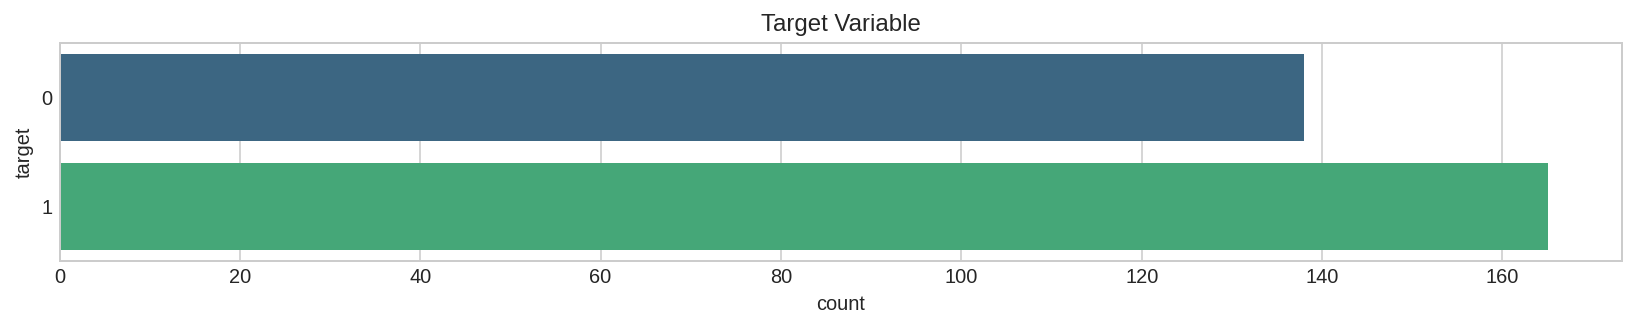

In [7]:
plt.figure(figsize = (14,2))
sns.countplot(data = df, y = "target", palette = "viridis")
plt.title("Target Variable")
plt.show()

### 4.2 Age

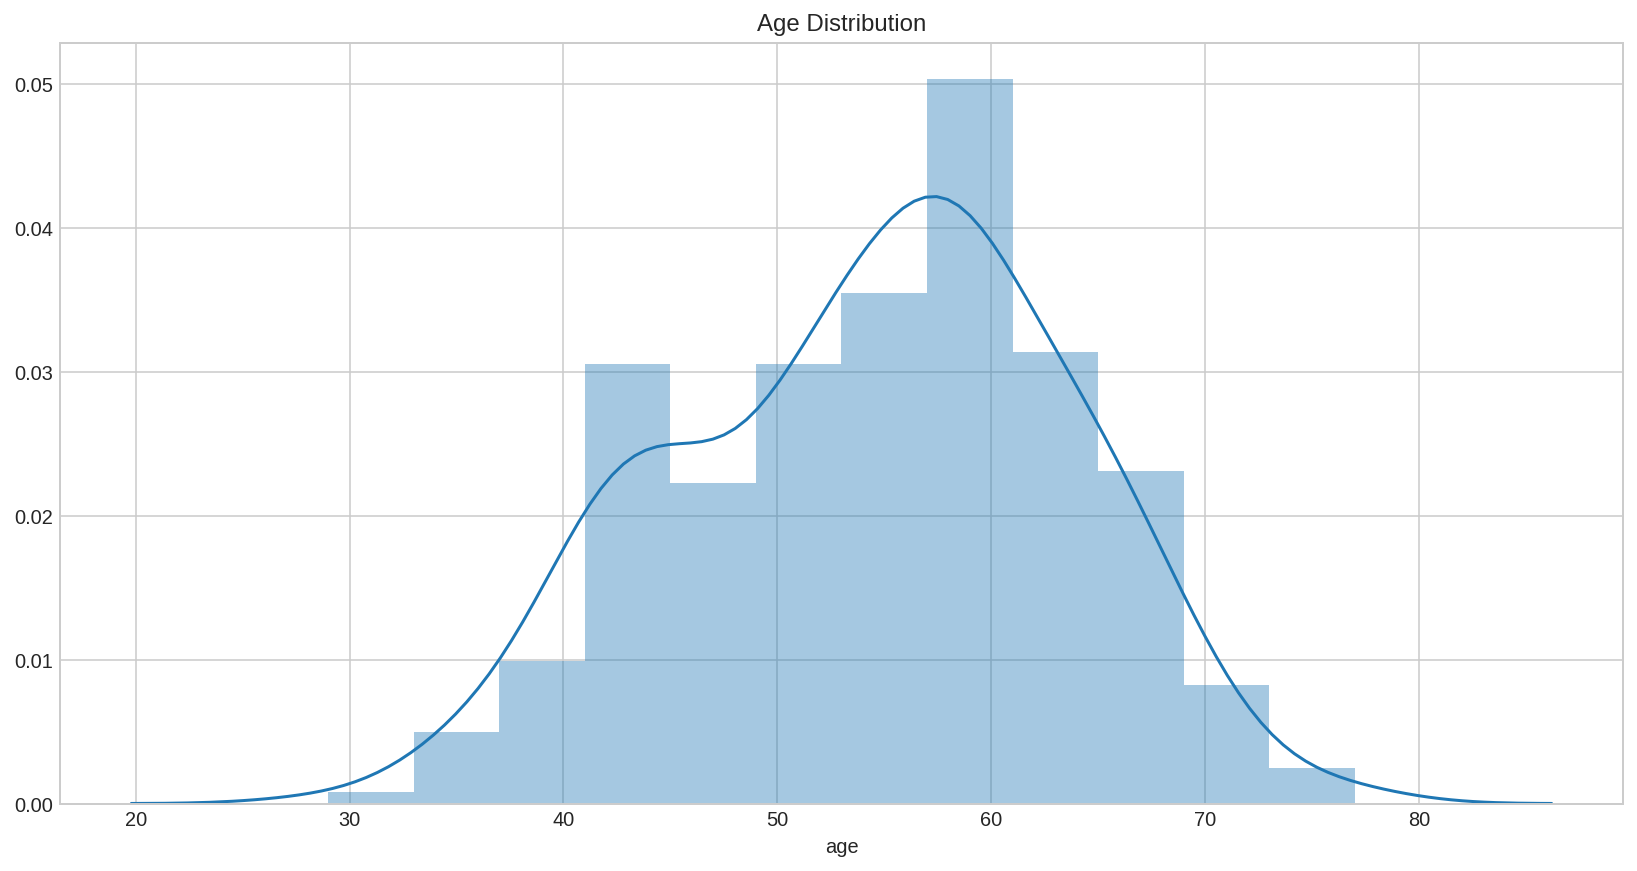

In [8]:
plt.figure(figsize = (14,7))
sns.distplot(df.age)
plt.title("Age Distribution")
plt.show()

### 4.3 Gender

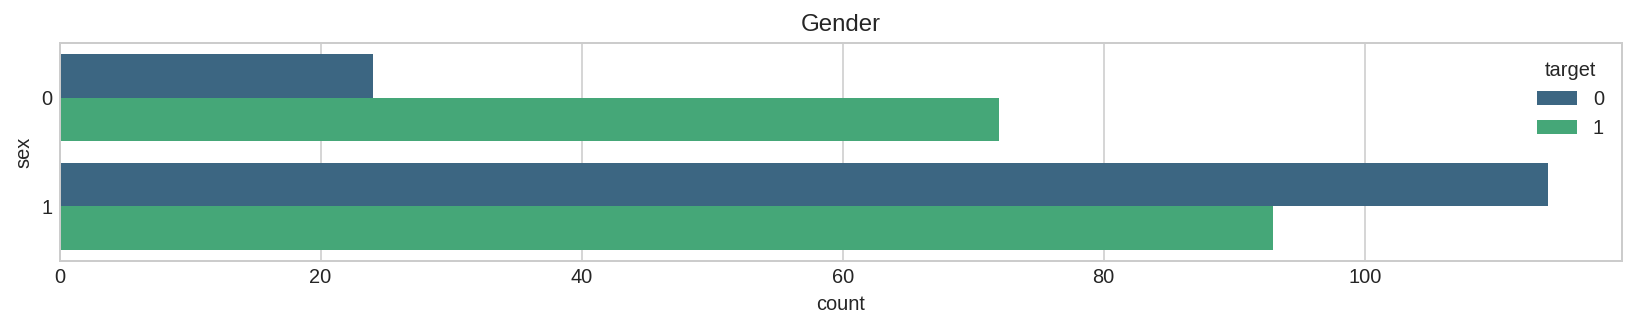

In [9]:
plt.figure(figsize = (14,2))
sns.countplot(data = df, y = "sex", hue = "target", palette = "viridis")
plt.title("Gender")
plt.show()

### 4.4 Chest Pain Type

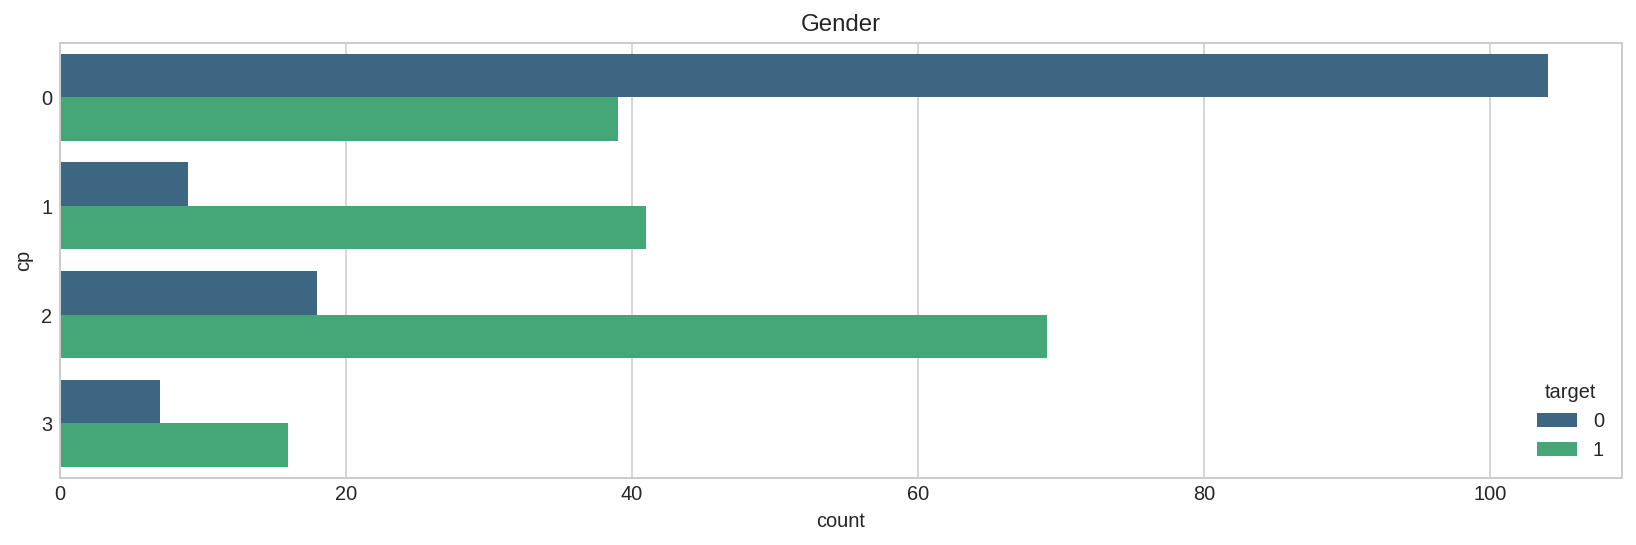

In [10]:
plt.figure(figsize = (14,4))
sns.countplot(data = df, y = "cp", hue = "target", palette = "viridis")
plt.title("Gender")
plt.show()

### 4.5 Resting Blood Pressure

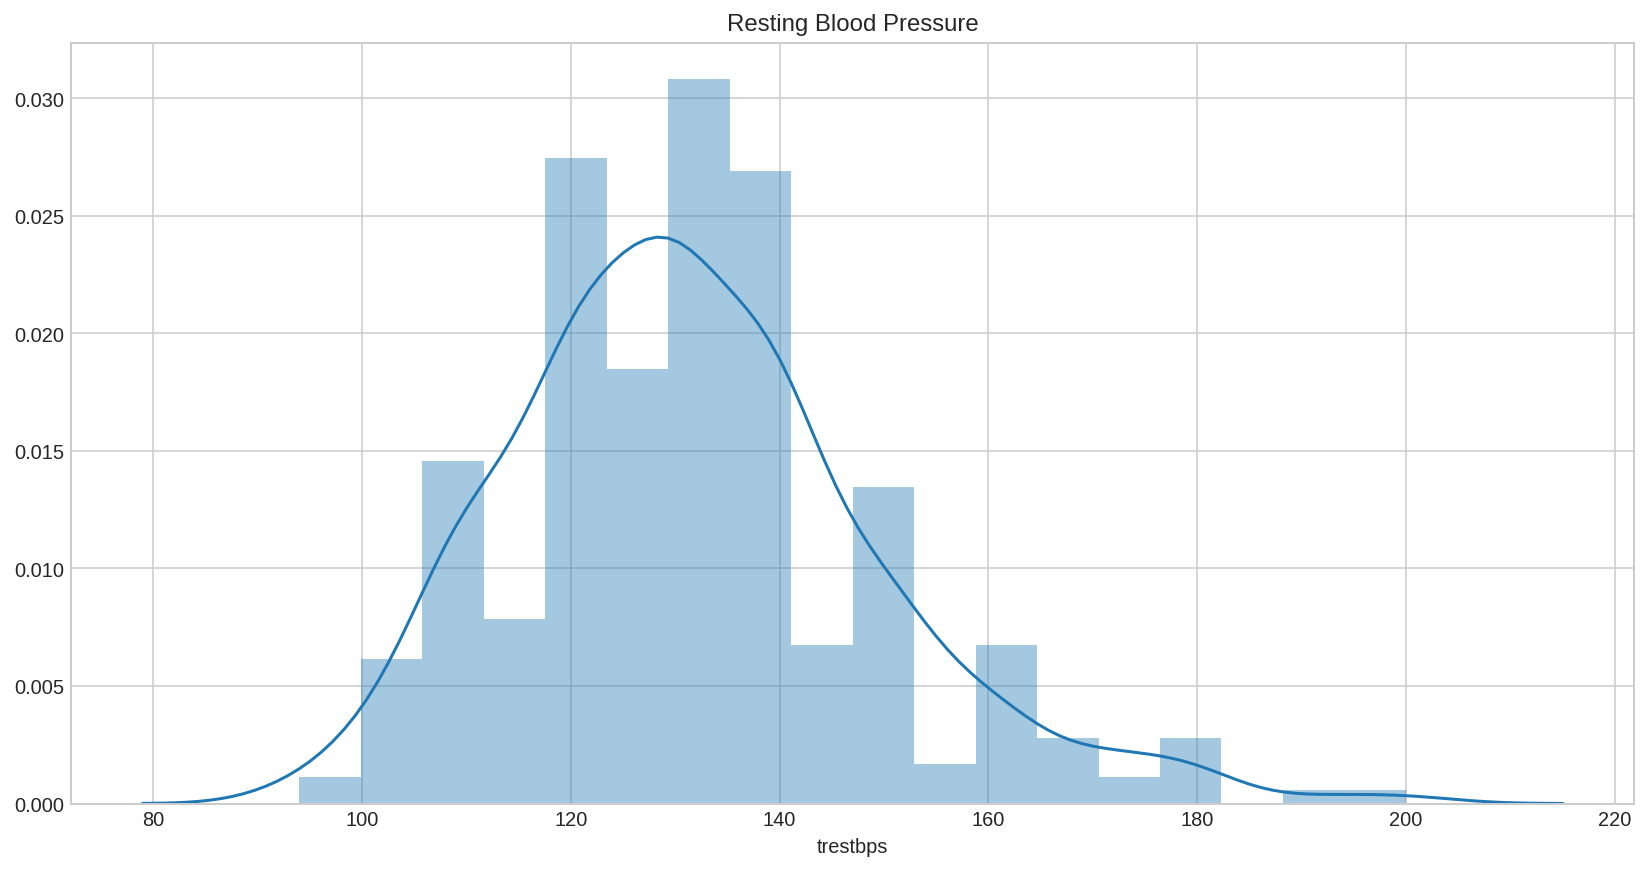

In [11]:
plt.figure(figsize = (14,7))
sns.distplot(df.trestbps)
plt.title("Resting Blood Pressure")
plt.show()

### 4.6 Serum Cholestoral

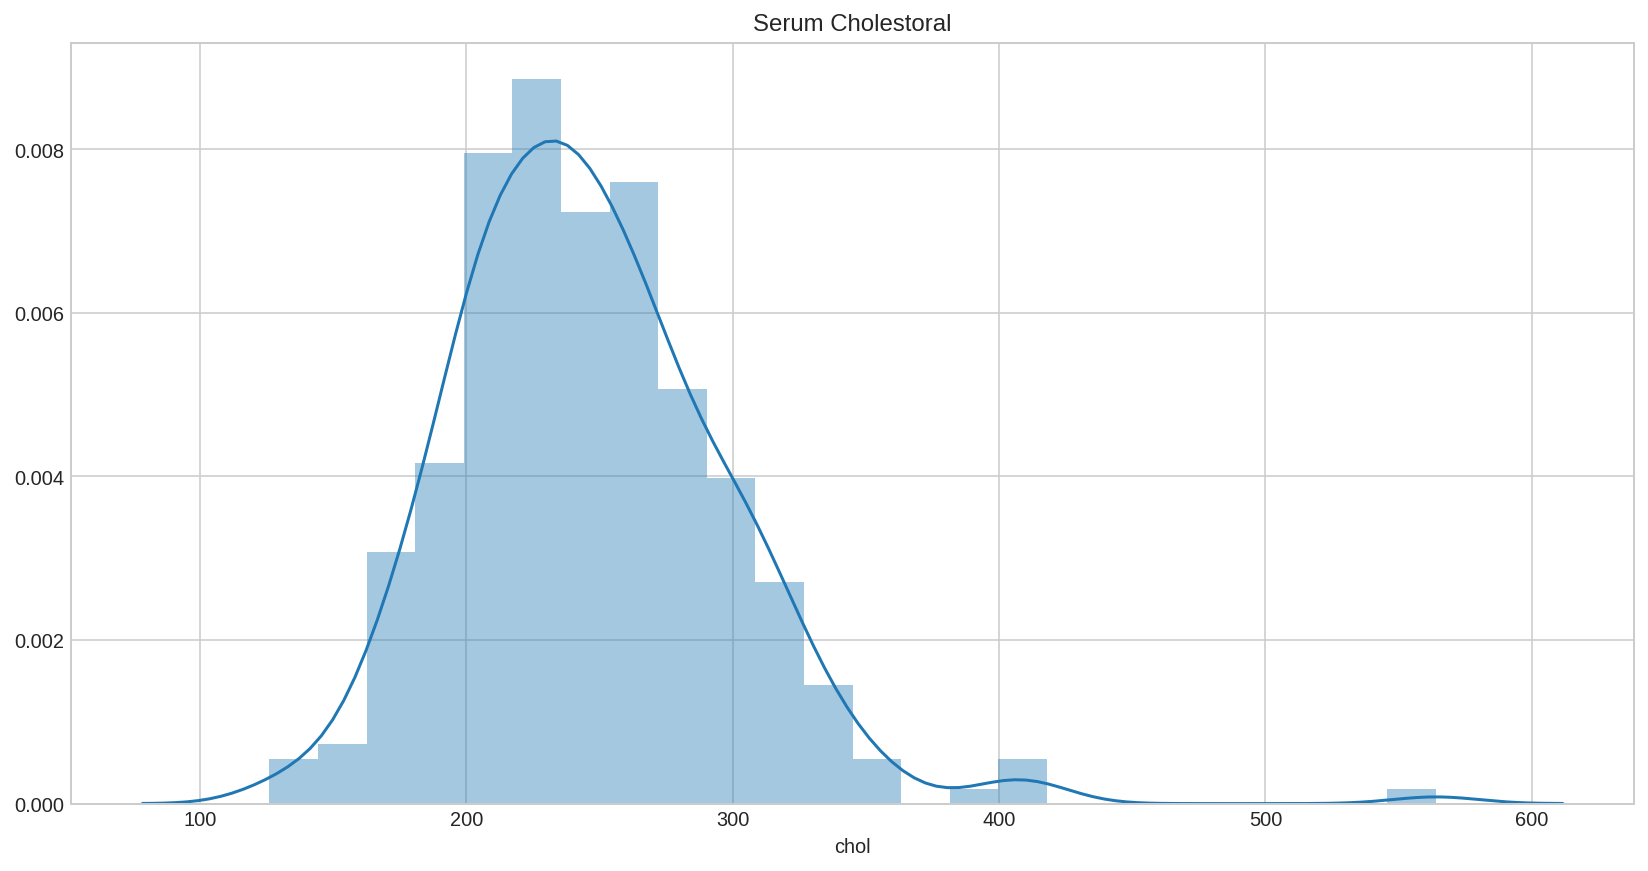

In [12]:
plt.figure(figsize = (14,7))
sns.distplot(df.chol)
plt.title("Serum Cholestoral")
plt.show()

### 4.7 Fasting Blood Sugar

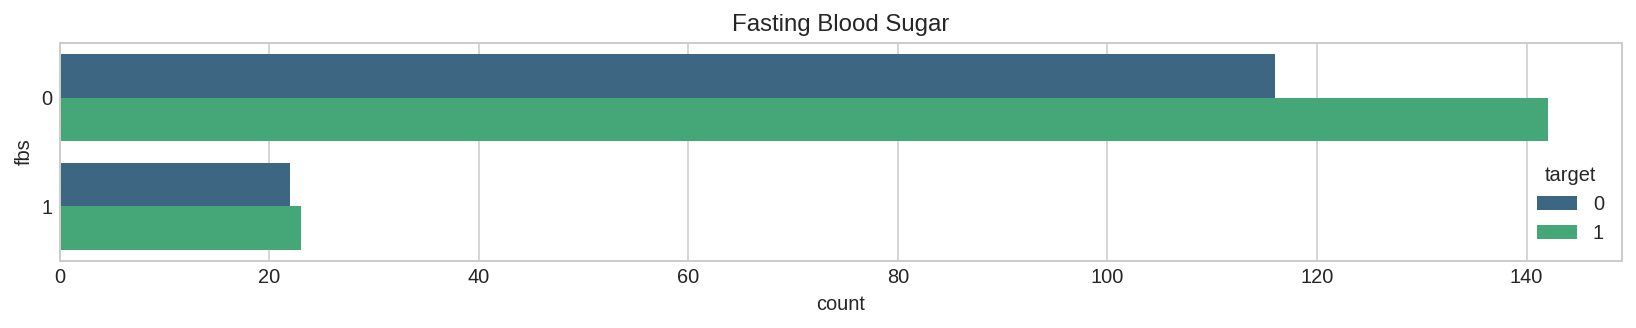

In [13]:
plt.figure(figsize = (14,2))
sns.countplot(data = df, y = "fbs", hue = "target", palette = "viridis")
plt.title("Fasting Blood Sugar")
plt.show()

### 4.8 Resting Electrocardiographic Results

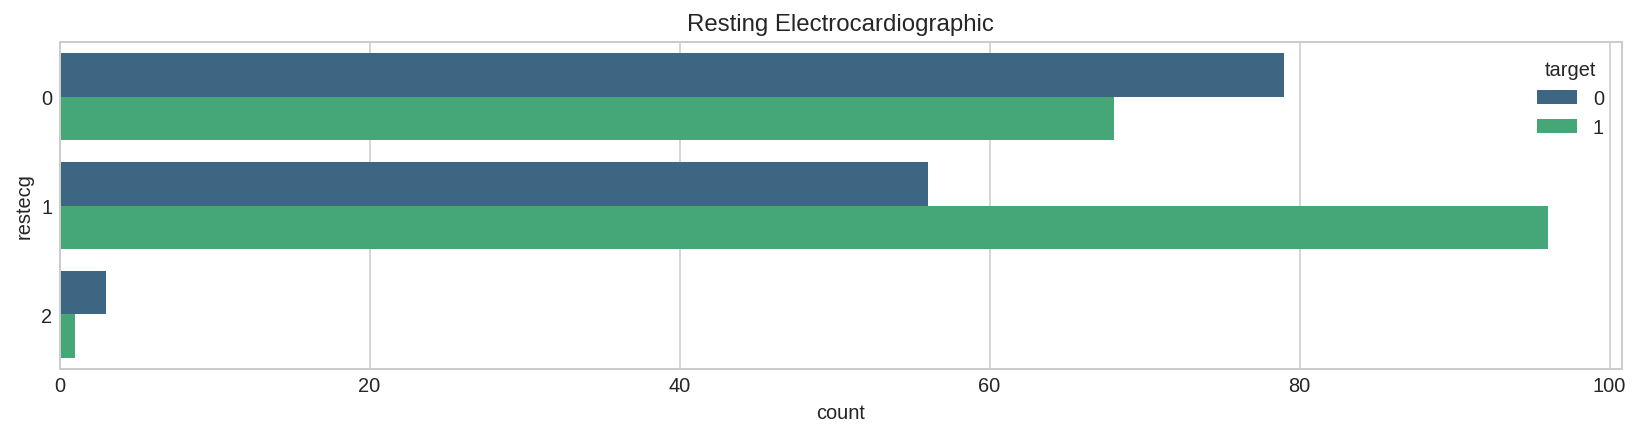

In [14]:
plt.figure(figsize = (14,3))
sns.countplot(data = df, y = "restecg", hue = "target", palette = "viridis")
plt.title("Resting Electrocardiographic")
plt.show()

### 4.9 Maximum Heart Rate Achieved

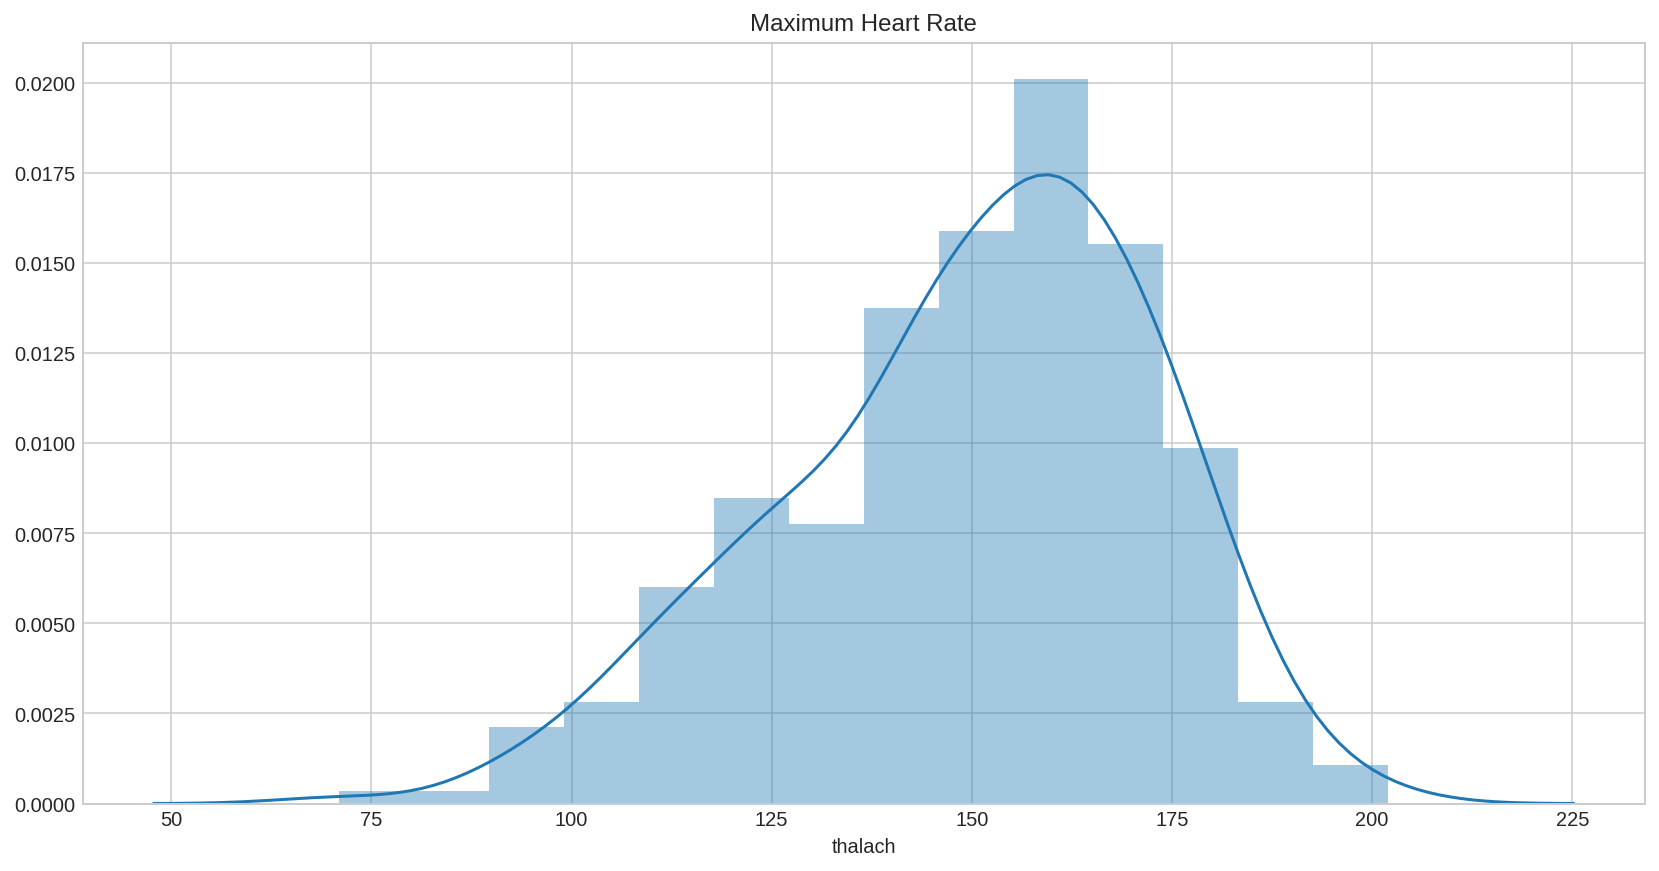

In [15]:
plt.figure(figsize = (14,7))
sns.distplot(df.thalach)
plt.title("Maximum Heart Rate")
plt.show()

### 4.10 Exercise Induced Angina

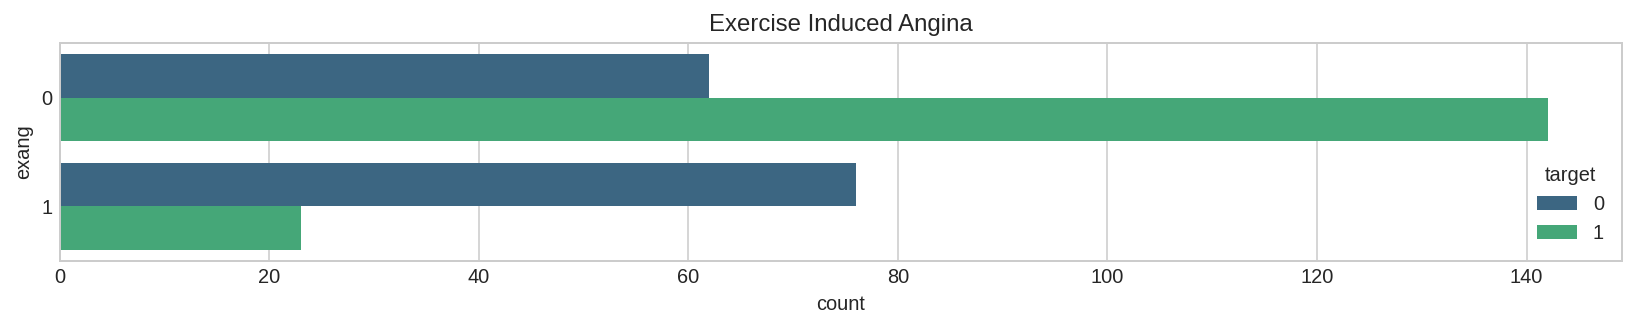

In [16]:
plt.figure(figsize = (14,2))
sns.countplot(data = df, y = "exang", hue = "target", palette = "viridis")
plt.title("Exercise Induced Angina")
plt.show()

### 4.11 Correlation

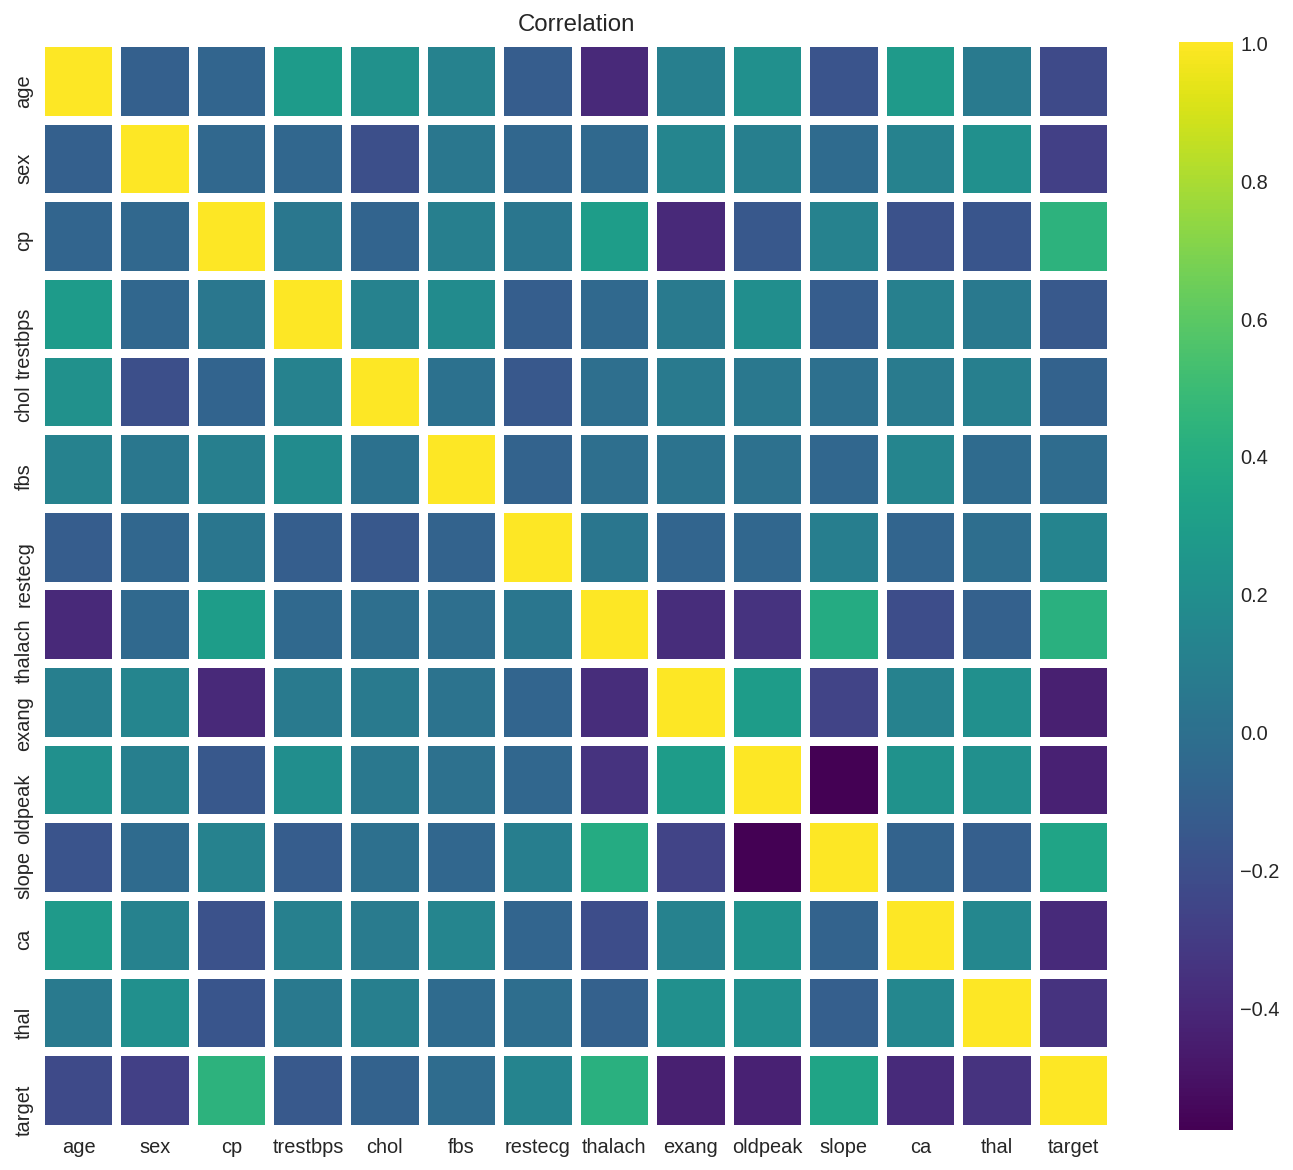

In [17]:
corr = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr, cmap = "viridis", linewidth = 4, linecolor = "white")
plt.title("Correlation")
plt.show()

### 4.12 PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
X = df.drop(["target"], axis = 1)
Y = df["target"]

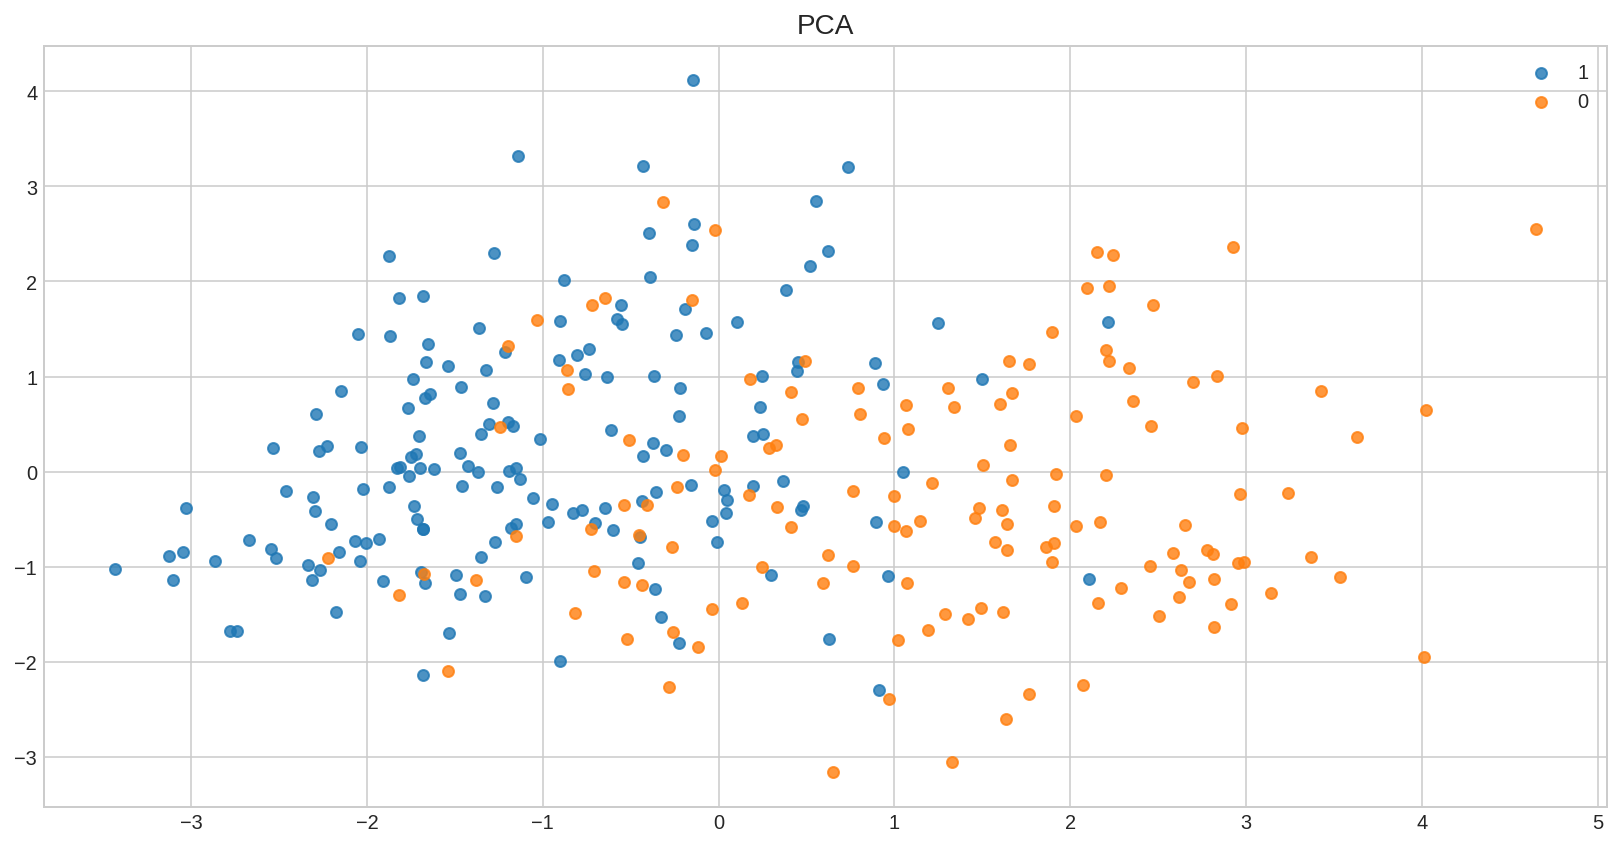

In [20]:
scaler = StandardScaler()
X_pca = scaler.fit_transform(X)

pca = PCA(n_components = 2)
X_pca_transformed = pca.fit_transform(X_pca)

plt.figure(figsize = (14,7))

for i in Y.unique():
    X_pca_filtered = X_pca_transformed[Y == i, :]
    plt.scatter(X_pca_filtered[:, 0], X_pca_filtered[:, 1], s = 30, label = i, alpha = 0.8)
    
plt.legend()
plt.title("PCA", fontsize = 14)
plt.show()

## 5. Machine Learning

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.pipeline import Pipeline

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### 5.1 Random Forest

{'rf__max_depth': 3, 'rf__n_estimators': 250}

Cross-Validated-Score: 0.758889

Learning Curve:


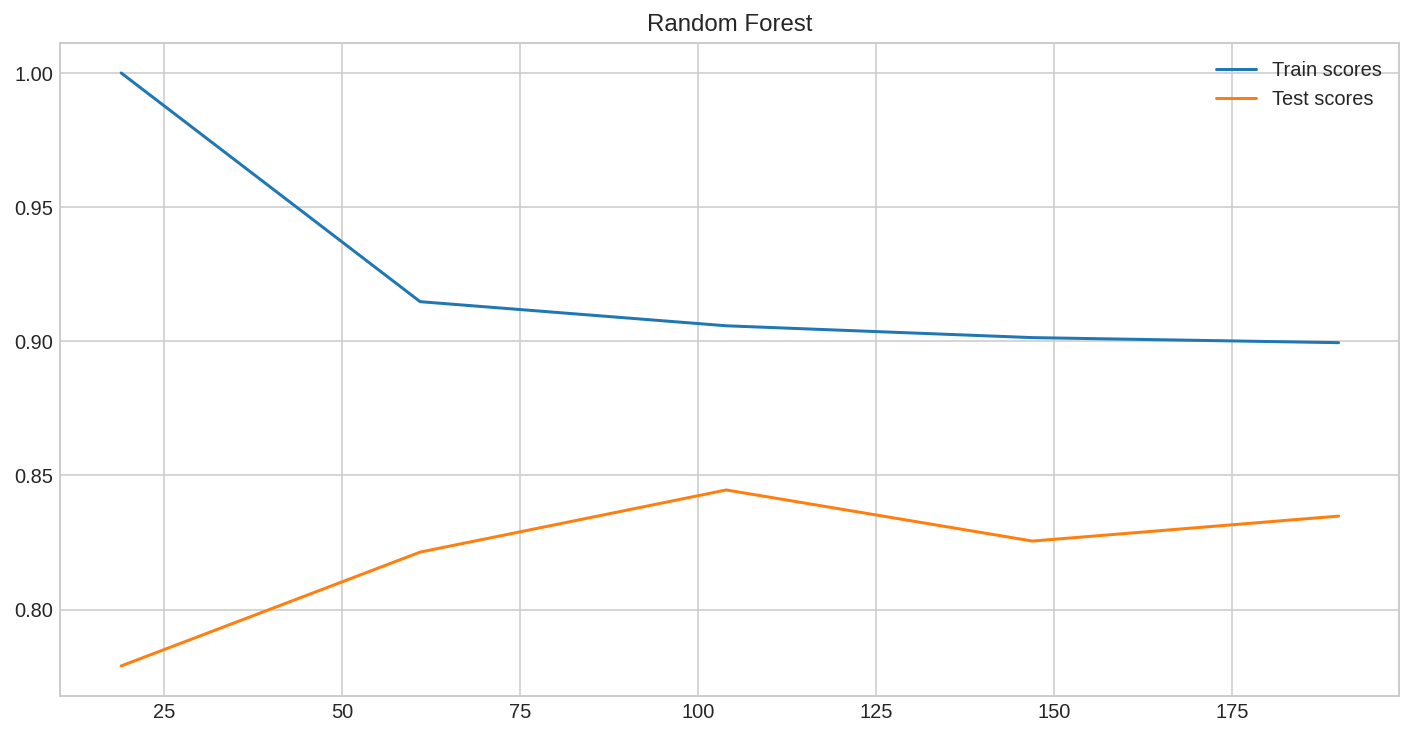

In [23]:
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(criterion = "gini", 
                                  max_features = "auto"))])

params_rf = {
    "rf__n_estimators" : [200, 250, 300, 400, 600],
    "rf__max_depth" : [1, 3, 5, 7, 9]}

grid = GridSearchCV(pipe_rf, params_rf, cv = StratifiedKFold(n_splits = 5), n_jobs = -1)
grid.fit(X_train, Y_train)

print(grid.best_params_)

grid = grid.best_estimator_
rf_score = cross_val_score(grid, X_test, Y_test, cv = 10, n_jobs = -1)

print("")
print("Cross-Validated-Score: " + str(round(rf_score.mean(), 6)))

train_size, train_score, test_score = learning_curve(grid, X_train, Y_train, cv = 10, n_jobs = -1)

print("")
print("Learning Curve:")

plt.figure(figsize = (12,6))
plt.plot(train_size, np.mean(train_score, axis = 1), label = "Train scores")
plt.plot(train_size, np.mean(test_score, axis = 1), label = "Test scores")
plt.title("Random Forest")
plt.legend()
plt.show()

### 5.2 K Nearest Neighbor

{'knn__leaf_size': 10, 'knn__n_neighbors': 9}

Cross-Validated-Score: 0.835556

Learning Curve:


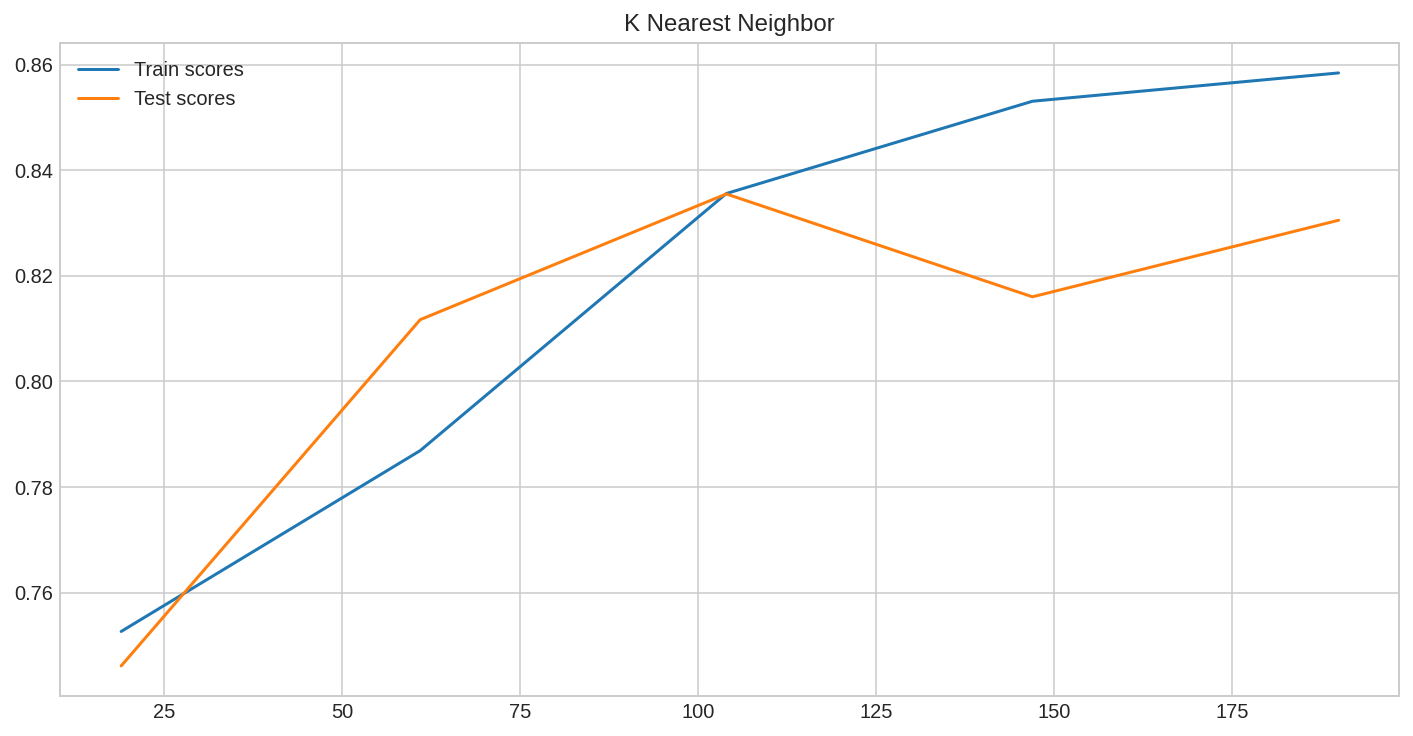

In [24]:
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(algorithm = "auto"))])

params_knn = {
    "knn__n_neighbors" : [2, 3, 5, 7, 9],
    "knn__leaf_size" : [10, 20, 30, 40]}

grid = GridSearchCV(pipe_knn, params_knn, cv = StratifiedKFold(n_splits = 5), n_jobs = -1)
grid.fit(X_train, Y_train)

print(grid.best_params_)

grid = grid.best_estimator_
knn_score = cross_val_score(grid, X_test, Y_test, cv = 10, n_jobs = -1)

print("")
print("Cross-Validated-Score: " + str(round(knn_score.mean(), 6)))

train_size, train_score, test_score = learning_curve(grid, X_train, Y_train, cv = 10, n_jobs = -1)

print("")
print("Learning Curve:")

plt.figure(figsize = (12,6))
plt.plot(train_size, np.mean(train_score, axis = 1), label = "Train scores")
plt.plot(train_size, np.mean(test_score, axis = 1), label = "Test scores")
plt.title("K Nearest Neighbor")
plt.legend()
plt.show()

### 5.3 Logistic Regression

{'log__C': 0.01, 'log__max_iter': 10000, 'log__solver': 'liblinear'}

Cross-Validated-Score: 0.803333

Learning Curve:


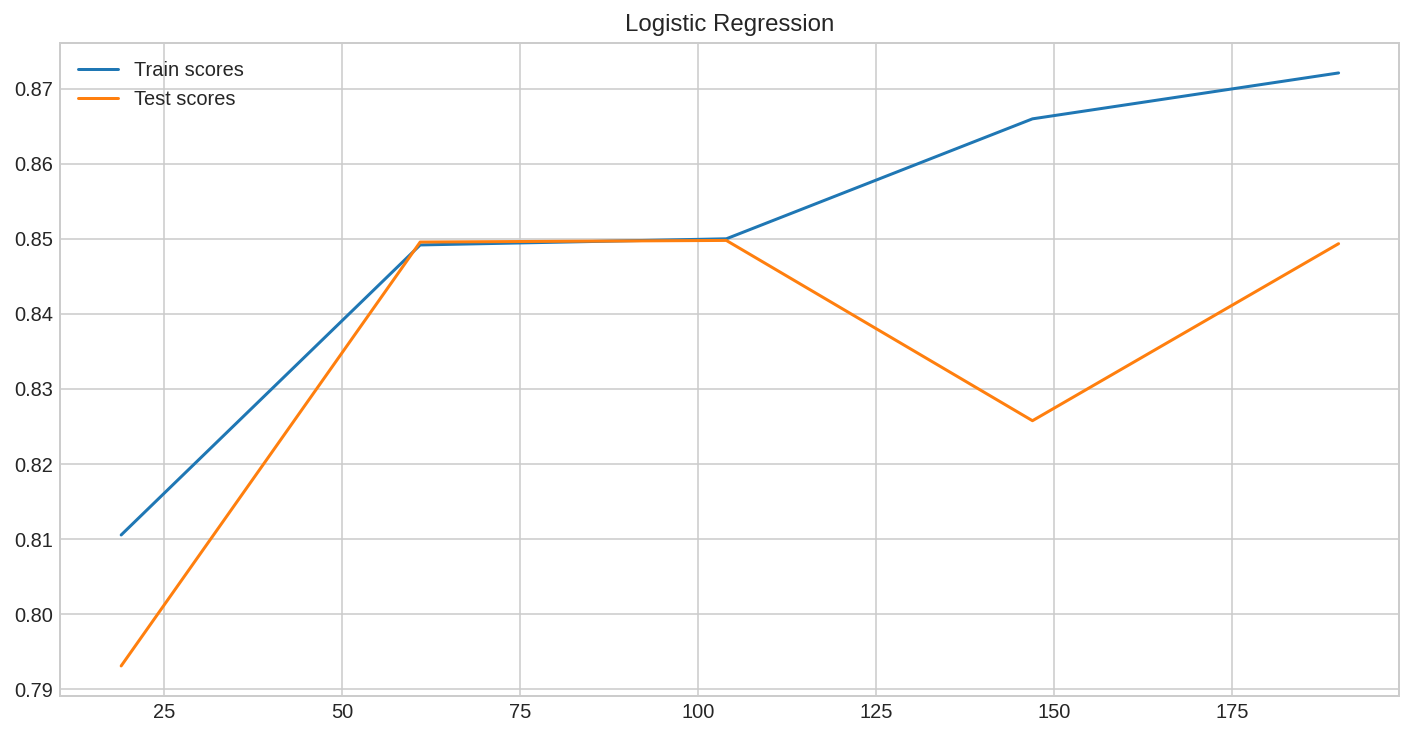

In [25]:
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("log", LogisticRegression())])

params_log = {
    "log__C" : [0.001, 0.01, 0.1, 1, 1.1, 10],
    "log__max_iter" : [10000],
    "log__solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

grid = GridSearchCV(pipe_log, params_log, cv = StratifiedKFold(n_splits = 5), n_jobs = -1)
grid.fit(X_train, Y_train)

print(grid.best_params_)

grid = grid.best_estimator_
log_score = cross_val_score(grid, X_test, Y_test, cv = 10, n_jobs = -1)

print("")
print("Cross-Validated-Score: " + str(round(log_score.mean(), 6)))

train_size, train_score, test_score = learning_curve(grid, X_train, Y_train, cv = 10, n_jobs = -1)

print("")
print("Learning Curve:")

plt.figure(figsize = (12,6))
plt.plot(train_size, np.mean(train_score, axis = 1), label = "Train scores")
plt.plot(train_size, np.mean(test_score, axis = 1), label = "Test scores")
plt.title("Logistic Regression")
plt.legend()
plt.show()

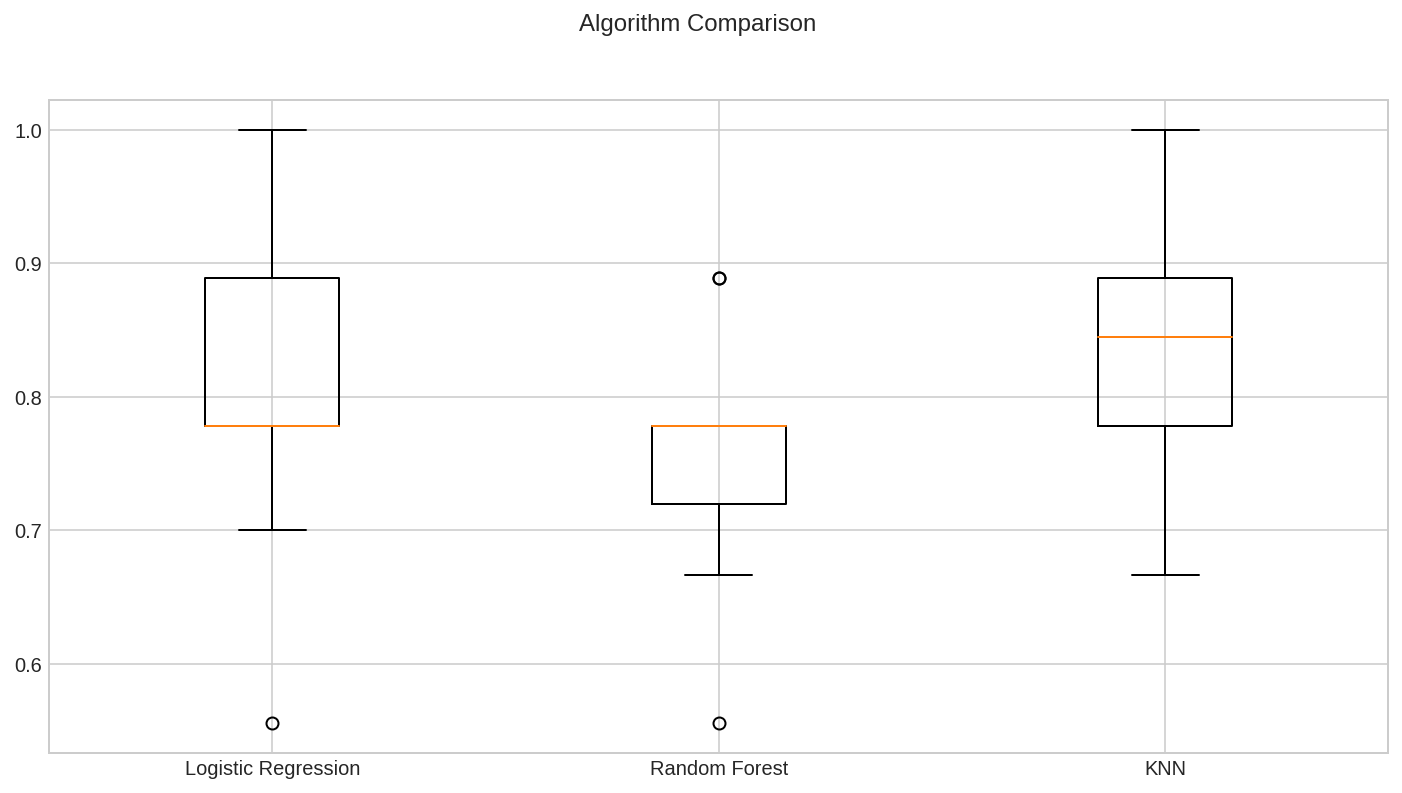

In [26]:
all_results = [log_score, rf_score, knn_score]

result_names = [ "Logistic Regression", 
                "Random Forest", 
                "KNN"]

fig = plt.figure(figsize = (12,6))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(all_results)
ax.set_xticklabels(result_names)
plt.show()